# <center> PHY 102 Lab - Repulsion</center>
### <center>University of Mount Union</center>

## Cell 1

Modify the parameters (lines 12-18) and the code for the particle's acceleration (line 35). Don't edit anything else!

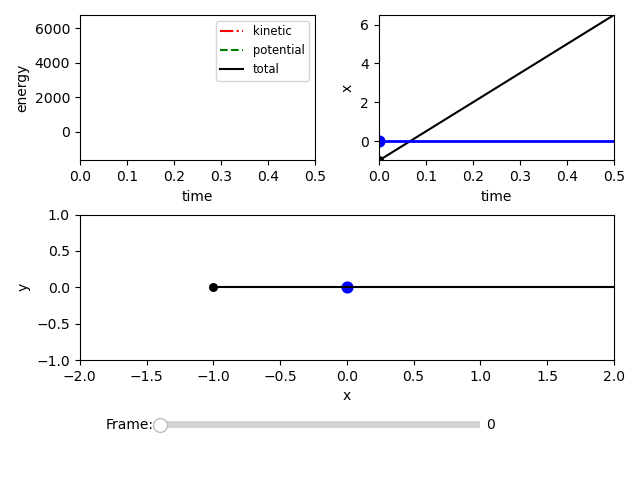

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.widgets import Slider
from scipy.integrate import odeint
# use widget on the online binder; notebook
# may work better on a local machine:
#%matplotlib notebook
%matplotlib widget

#Parameter values (edit these!)
Q = 1         # Default: 1
q = 1         # Default: 1
K = 10        # Default: 10
m = 1         # Default: 1
x0 = -1       # Default: -1
v0 = 15       # Default: 15
t_max = 0.5   # Default: 0.5

# Functions
def derivs(params,t):
    # Solves ODE for motion of particle q
    x,v = params
    
    # stop if a collision is imminent
    if abs(x) < 1E-6: return 0,0
    
    # Determine the angle between the charges
    theta = math.atan2(0,x)
    
    # derivative of position is velocity
    x_deriv = v
    # derivative of velocity is acceleration
    # You fill this in!
    v_deriv = 0
    
    return x_deriv,v_deriv

def update(i):
    # Used to update animated figure
    marker_q.set_offsets([xpoints[i],ypoints[i]])
    marker_traj_q.set_offsets([tpoints[i],xpoints[i]])
    marker_traj_Q.set_offsets([tpoints[i],0])
    
    line_KE.set_data(tpoints[:i],KE[:i])
    line_PE.set_data(tpoints[:i],PE[:i])
    line_TE.set_data(tpoints[:i],TE[:i])
    fig.canvas.draw_idle()



# ====================================
# Don't edit anything below this line!
# ====================================

# Obtain simulation results data
tpoints = np.linspace(0,t_max,1000)     # time
ypoints = np.zeros(1000)                # no motion in vertical
output = odeint(derivs,[x0,v0],tpoints) # solve ODE
xpoints = output[:,0]                   # parse out x positions for q
vpoints = output[:,1]                   # parse out x velocities for q

KE = 0.5*m*vpoints**2                   # calculate kinetic energy
PE = -K*q*Q/xpoints                     # calculate potential energy
TE = KE+PE                              # calculate total energy

# Make initial figure
fig = plt.figure()

# top left panel shows energies
ax1 = plt.subplot(221)
line_KE, = ax1.plot([],[],'r-.',label='kinetic')
line_PE, = ax1.plot([],[],'g--',label='potential')
line_TE, = ax1.plot([],[],'k-',label='total')
ax1.set_xlim(0,tpoints[-1])
ax1.set_ylim(np.min(np.hstack((KE,PE,TE)))-0.1,np.max(np.hstack((KE,PE,TE)))+0.1)
ax1.set_xlabel('time')
ax1.set_ylabel('energy')
ax1.legend(loc='upper right',fontsize='small')

# top right panel shows x position vs time
ax2 = plt.subplot(222)
line_traj = ax2.plot(tpoints,xpoints,'k-')
marker_traj_q = ax2.scatter(0,x0,marker='o',s=30,c='k')
marker_traj_Q = ax2.scatter(0,0,marker='o',s=60,c='b')
ax2.set_xlim(0,tpoints[-1])
ax2.set_ylim(np.min(xpoints),np.max(xpoints))
if min(ax2.get_ylim()) >0:
    ax2.set_ylim(bottom = -0.05)
elif max(ax2.get_ylim()) < 0:
    ax2.set_ylim(top = 0.05)
ax2.axhline(y=0,c='b',lw=2)
ax2.set_xlabel('time')
ax2.set_ylabel('x')

# bottom panel shows position (y vs x)
ax3 = plt.subplot(212)
line, = ax3.plot(xpoints,ypoints,'k')
marker_q = ax3.scatter(x0,0,marker='o',s=30,c='k')
marker_Q = ax3.scatter(0,0,marker='o',s=60,c='b')
ax3.set_xlim(-2*abs(x0),2*abs(x0))
ax3.set_ylim(-1,1)
ax3.set_xlabel('x')
ax3.set_ylabel('y') 

# label r_min in bottom panel
if x0<0: pointer_x = max(xpoints)
else: pointer_x = min(xpoints)
ax3.annotate('rmin='+'{0:.3e}'.format(abs(pointer_x)),
             [pointer_x,0],[pointer_x,0.5],
             arrowprops =dict(facecolor='magenta',arrowstyle='-|>'))

plt.tight_layout()

# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valmin=0,
    valmax=999,
    valstep = list(range(1000)),
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()